In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

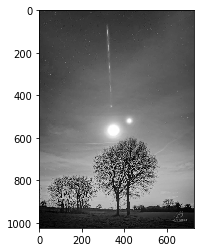

(1024, 729)


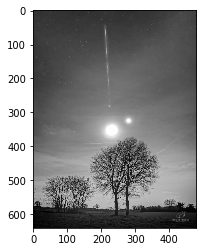

(640, 480)


In [12]:
# Load an image
im = cv2.imread('./img.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)

plt.imshow(im, cmap='gray')
plt.show()
print im.shape

# Resize for faster computation
im = cv2.resize(im, (480, 640))
plt.imshow(im, cmap='gray')
plt.show()

print im.shape

In [13]:
print im

[[48 48 48 ..., 62 61 61]
 [48 48 48 ..., 63 63 61]
 [48 48 48 ..., 64 64 62]
 ..., 
 [ 6  3  0 ...,  7  7  5]
 [ 3  2  1 ...,  6  9  7]
 [ 1  3  5 ...,  2  3  4]]


In [20]:
kernel = np.array([[-1, -2, -1], 
                   [0, 0, 0], 
                   [1, 2, 1]], dtype='float32')
print kernel, kernel.sum()

'''
Kernel is the superimposition matrix with which the hadamard product of the original image matrix is taken
On average, if the sum of all elements of kernel is > 1, then the image becomes brighter, it gets duller as it gets close to 0
Dimensions of kernel are usually odd because the output of Hadamard product has dimensions (m-p+1, n-q+1) - where m*n is the dimension of the image. Therefore, to make the resultant image has even dimensions, the kernel is taken with odd dimensions.
Visit http://setosa.io/ev/image-kernels/ for reference to interactive convolutions to get a feel of kernels
'''

[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]] 0.0


'\nKernel is the superimposition matrix with which the hadamard product of the original image matrix is taken\nOn average, if the sum of all elements of kernel is > 1, then the image becomes brighter, it gets duller as it gets close to 0\nDimensions of kernel are usually odd because the output of Hadamard product has dimensions (m-p+1, n-q+1) - where m*n is the dimension of the image. Therefore, to make the resultant image has even dimensions, the kernel is taken with odd dimensions.\nVisit http://setosa.io/ev/image-kernels/ for reference to interactive convolutions to get a feel of kernels\n'

In [21]:
def hadamard_product(mat_01, mat_02):
    m, n = mat_01.shape
    p, q = mat_02.shape
    
    if not (m==p and n==q):
        return 0         # Error - Hadamard product can only be applied to matrices of exact same dimensions
    
    return mat_01*mat_02

def convolution2D(image, kernel):
    m, n = image.shape
    p, q = kernel.shape
    out = np.zeros([m-p+1, n-q+1])    # Because kernel can be superimposed only (m-p+1 * n-q+1) times
    
    # Convolve
    for ix in range(out.shape[0]):
        for iy in range(out.shape[1]):
            im_patch = image[ix:ix+p, iy:iy+q]
            prod = hadamard_product(im_patch, kernel)
            val = prod.sum()
            if val < 0.0:
                val = 0.0         #Black
            elif val > 255.0:
                val = 255.0       #White
            out[ix,iy] = val
    
    return out

(638, 478)
[[  0.   0.   0. ...,   0.   6.   9.]
 [  0.   0.   0. ...,   0.   0.   0.]
 [  0.   0.   0. ...,   2.   0.   0.]
 ..., 
 [  0.   0.   0. ...,   0.   0.   0.]
 [  0.   0.   0. ...,   0.   0.  14.]
 [  0.  15.  18. ...,   0.   0.   0.]]


<function matplotlib.pyplot.show>

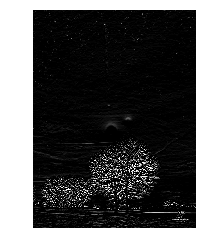

In [22]:
c = convolution2D(im, kernel)
print c.shape

print c

plt.figure(0)
plt.axis('off')
plt.imshow(c, cmap = 'gray')
plt.show